<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descente-de-gradient:-choix-de-pas,-démonstration-interactive" data-toc-modified-id="Descente-de-gradient:-choix-de-pas,-démonstration-interactive-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descente de gradient: choix de pas, démonstration interactive</a></span></li></ul></div>

# Descente de gradient: choix de pas, démonstration interactive

***
> __Auteur__: Alexandre Gramfort, Joseph Salmon <joseph.salmon@umontpellier.fr>

We're interested in minimizing

$f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2$

**Question** : is it a convex function?

In [70]:
import numpy as np
from numba import njit

@njit
def f(x):
    x1, x2 = x[0],x[1]
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

In [71]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')
from mpl_toolkits import mplot3d

In [72]:
X1, X2 = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                     np.linspace(-5.5, 5.5, 50))
Z = f(np.array([X1, X2]))  # Altitude

<IPython.core.display.Javascript object>


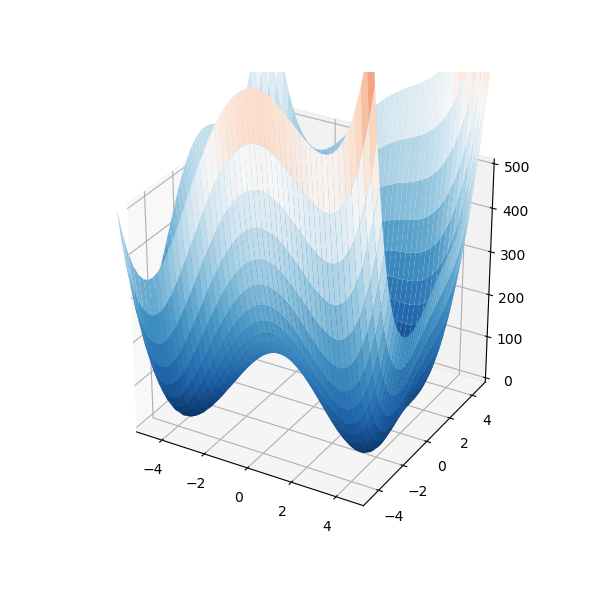

In [73]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap=cmap_reversed, edgecolor='none')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 500)
plt.show()

<IPython.core.display.Javascript object>


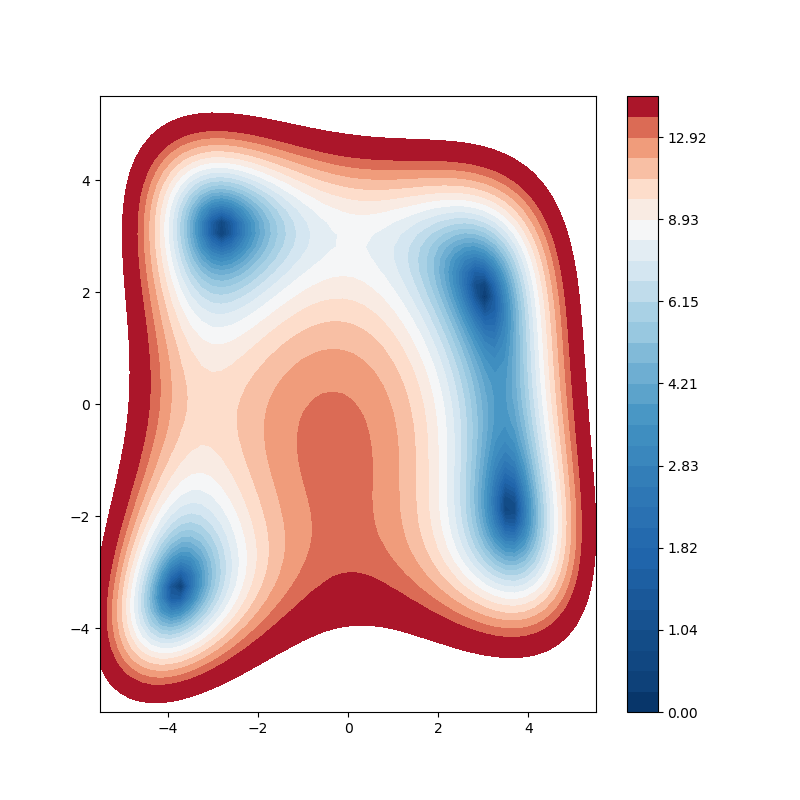

In [74]:
res = []

def init_plot():
    global res
    res = []
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.figure(figsize=(8, 8))
    plt.contourf(X1, X2, np.sqrt(Z), levels=np.sqrt(
        levels), cmap=cmap_reversed)
    plt.colorbar(extend='both')

def plot(xs=None,c=None):
    if xs is not None:
        x1, x2 = np.array(xs).T
        if c is not None  and len(c) > 0:
            for l in c:
                for handle in l:
                    handle.remove()
        c1 = plt.plot(x1, x2, 'k')
        c2 = plt.plot(x1, x2, 'o', color='purple')
        plt.show()
        return [c1,c2]
    return []

init_plot();

In [75]:
from numba import njit

@njit
def f_grad(x):
    x1, x2 = x
    df_x1 = 2 * (-7 + x1 + x2**2 + 2 * x1 * (-11 + x1**2 + x2))
    df_x2 = 2 * (-11 + x1**2 + x2 + 2 * x2 * (-7 + x1 + x2**2))
    return np.array([df_x1, df_x2])

@njit
def grad_descent(x0,step_size,max_iter=0):
    """Gradient descent with constant step size"""
    x = x0
    xs = [x]
    for k in range(max_iter):
        d_k = - f_grad(x)  # direction of descent
        t_k = step_size   # does not depend on k
        x = x + step_size * d_k
        xs.append(x)
    return xs

<IPython.core.display.Javascript object>


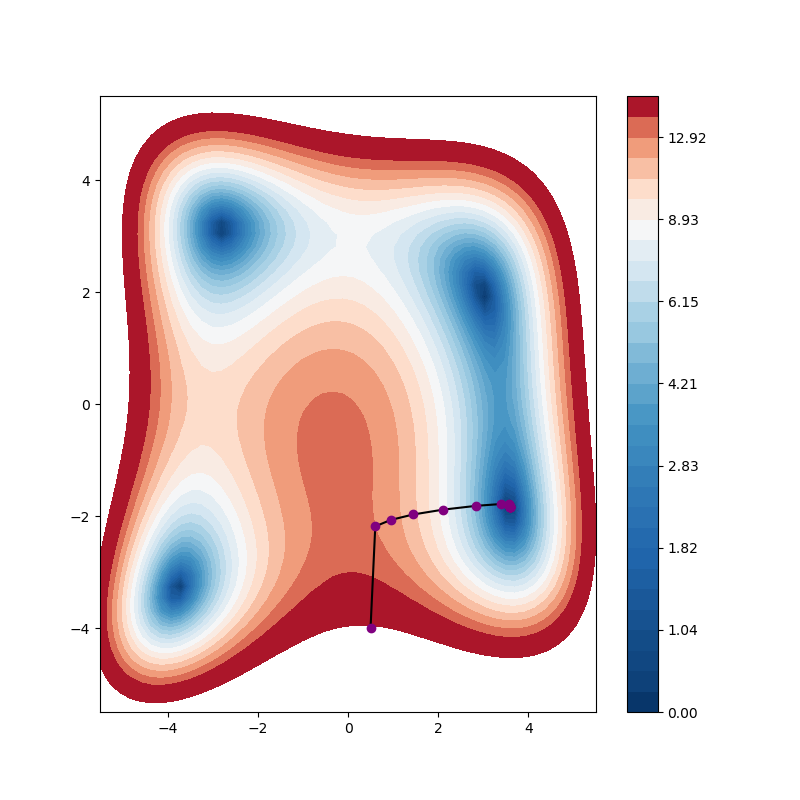

In [81]:
x0 = np.array([0.5, -4])

init_plot()

def grad_descent_plot(fdescent,*args,**kwargs):
    global res
    res = plot(fdescent(x0,*args,**kwargs),res)

grad_descent_plot(grad_descent,0.01, max_iter=20)

<IPython.core.display.Javascript object>


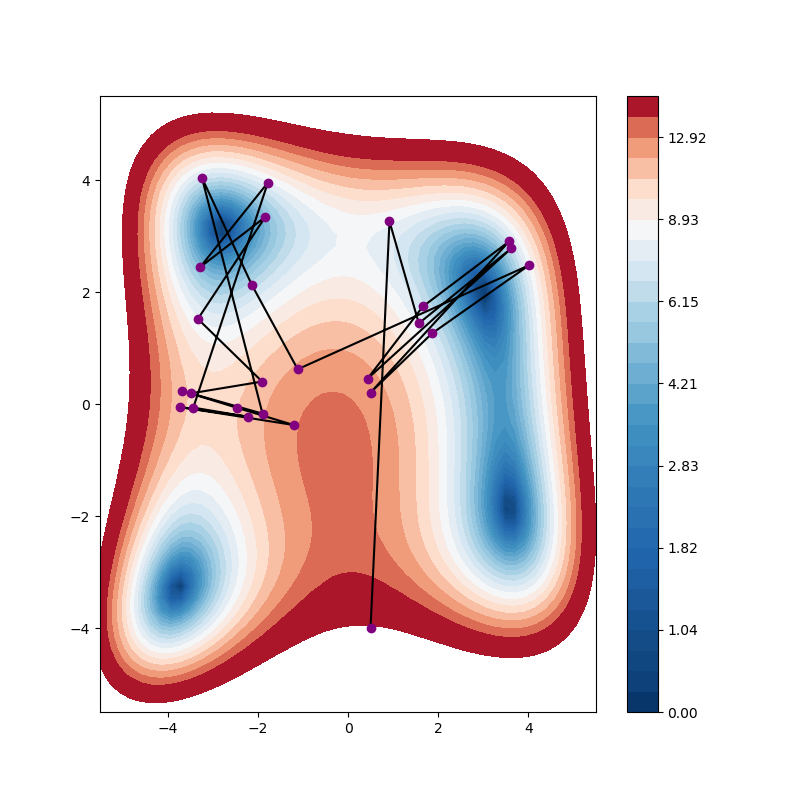

interactive(children=(FloatSlider(value=0.025, description='step_size', max=0.05, step=0.005), IntSlider(value…

In [82]:
from ipywidgets import interact,fixed

init_plot()
interact(grad_descent_plot, fdescent=fixed(grad_descent), step_size=(0., .05, 0.005), max_iter=(0, 50, 1));

<IPython.core.display.Javascript object>


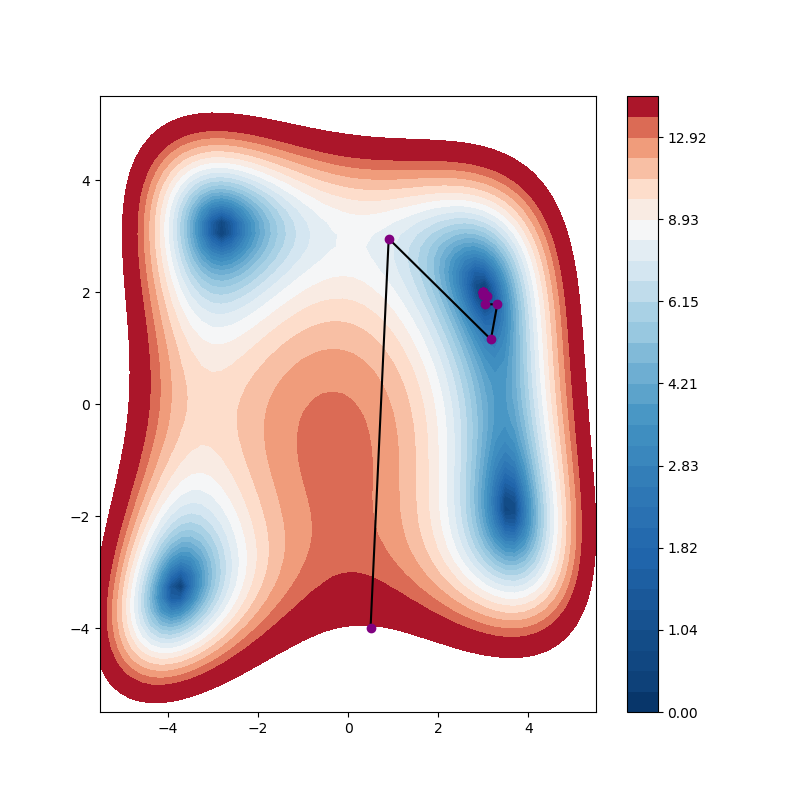

interactive(children=(Dropdown(description='fdescent', options=(('constant', CPUDispatcher(<function grad_desc…

In [83]:
from scipy import optimize

def grad_descent_line_search(x0,step_size=0.01, max_iter=2):
    """Gradient descent with constant step size or line search"""
    x = x0
    xs = [x0]
    for k in range(max_iter):
        d_k = -f_grad(x)
        c1, c2 = 0.1, 0.7
        t_k = optimize.line_search(f, f_grad, x, d_k, -d_k, c1=c1, c2=c2)[0]
        print("pas choisi:         {:.3f} \nnorme du gradient:  {:.3f} \ndistance parcourue: {}\n\n".format(t_k, np.linalg.norm(d_k), t_k *np.linalg.norm(d_k)))
        x = x + (t_k if t_k is not None else -step_size) * d_k
        xs.append(x)
    return xs

init_plot()
interact(grad_descent_plot, fdescent=[('constant',grad_descent),('line search',grad_descent_line_search)],step_size=(0., .05, 0.005), max_iter=(0, 50, 1));